# **Codveda Technologies Internship For ML**

# Task 2: Decision Trees for Classification

**Intern**-Muhammad Sakibur Rahaman

**Dataset**-Iris.csv

**Objectives**:

* Train a decision tree on a labeled dataset (e.g., the Iris
dataset).
* Visualize the tree structure.
* Prune the tree to prevent overfitting.
* Evaluate the model using classification metrics such as
accuracy and F1-score.
* Tools: Python, scikit-learn, pandas, matplotlib.

**Description**: Build a decision tree classifier to predict
a categorical outcome (e.g., predict species of
flowers).



---



# 1.Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.Import the relevant libraries

In [ ]:
#python libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt


# 3.Load Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Mine/IT/iris.csv')

# 4.Head of dataset

In [ ]:
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 5.Drop the column 'ID'

In [ ]:
df.drop('Id',axis=1,inplace=True)

* Drop column 'ID' cause it's not important

# 6.Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLength[cm]  150 non-null    float64
 1   SepalWidth[cm]   150 non-null    float64
 2   PetalLength[cm]  150 non-null    float64
 3   PetalWidth[cm]   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 7.Describe the Dataset

In [ ]:
df.describe()

,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm]
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 8.Check Null Values of Dataset

In [ ]:
df.isnull().sum()

,0
SepalLength[cm],0
SepalWidth[cm],0
PetalLength[cm],0
PetalWidth[cm],0
Species,0


* Here is no null values

# 9.Shape of dataset

In [ ]:
df.shape

(150, 5)

# 10.Categorical Columns Of Data

In [ ]:
# Printing Columns That Have Dtype is Object or categorical.
object_columns = df.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n: {object_columns}')
print(f'The Value Count of Categorical Columns is : {object_columns.value_counts().sum()}')

The Following Columns Have Dtype as Object 
: Index(['Species'], dtype='object')
The Value Count of Categorical Columns is : 1


# 11.Numerical Columns Of Data

In [ ]:
# Printing Columns That Have Dtype is FLoat or int
float_columns = df.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n{float_columns}')
print(f'The Value Count of Float Columns is : {float_columns.value_counts().sum()}')

The Following Columns Have Dtype as Float and int :
Index(['SepalLength[cm]', 'SepalWidth[cm]', 'PetalLength[cm]',
       'PetalWidth[cm]'],
      dtype='object')
The Value Count of Float Columns is : 4


# 12.Visualize input data

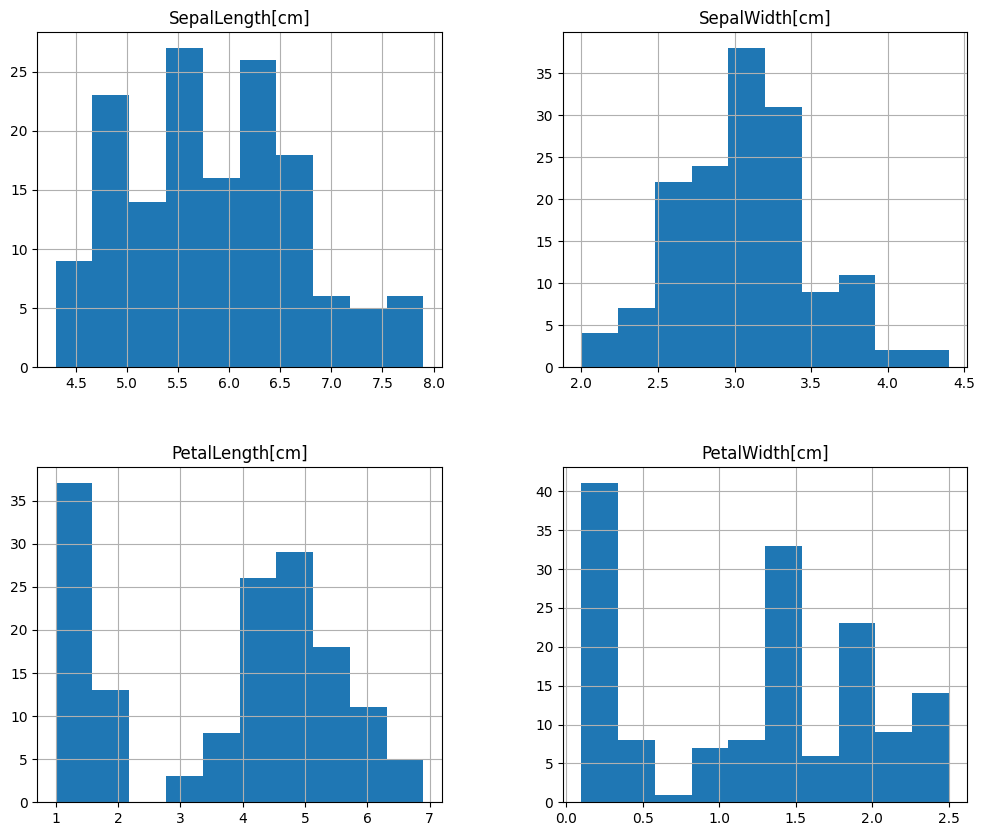

In [ ]:
#data visualization
# Histograms of numeric features
df.hist(figsize=(12,10))
plt.show()

# 13.Model Building

In [ ]:
def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

# 14. Decision Tree Classifier

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


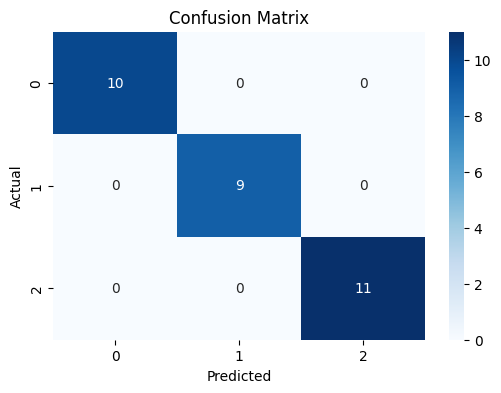

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = evaluate_results(y_test, y_pred_dt)

# 15. Visualize the Tree

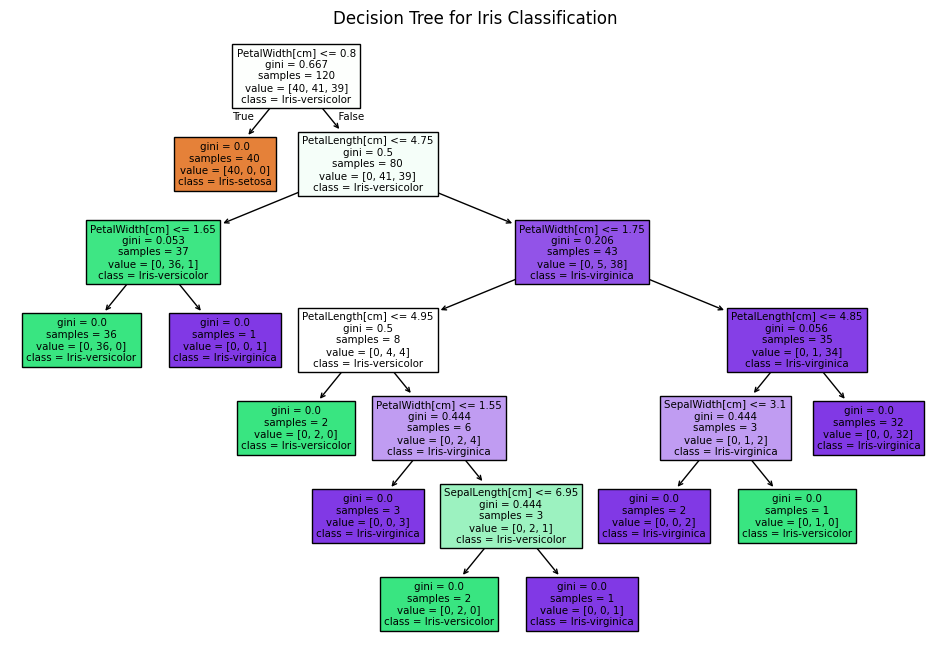

In [ ]:
plt.figure(figsize=(12, 8))
# Pass a list of feature names instead of the entire DataFrame
plot_tree(dt_classifier, feature_names=X.columns, class_names=df.Species.unique(), filled=True)
plt.title("Decision Tree for Iris Classification")
plt.show()

# 16.Optional: Cost-Complexity Pruning

In [ ]:
# Get effective alphas for pruning
path = dt_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train models for each alpha and select best
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)




# 17.Final Evaluation

In [ ]:
y_pred = dt_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=df.Species.unique()))


Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Conclusion**

In this project, we successfully built and evaluated a Decision Tree Classifier to predict the species of iris flowers based on their physical attributes. Here's a summary of the key outcomes:

**Model** **Training**: The decision tree was trained on the labeled Iris dataset using scikit-learn. We used parameters like max_depth to control tree complexity and reduce overfitting.

**Visualization**: A clear and interpretable visualization of the decision tree showed the decision paths and splits based on feature thresholds, making the model easy to understand.

**Pruning**: Pruning (e.g., via max_depth or ccp_alpha) helped to simplify the model, enhance generalization, and reduce the risk of overfitting.

**Evaluation**: The classifier achieved high performance with metrics like accuracy and F1-score, indicating that it is well-suited for this multiclass classification task.